In [37]:
import numpy as np
from ISLP import load_data
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt
Hitters = load_data("Hitters").dropna()
X = Hitters[['Hits', 'Years']].values # Features
y = np.log(Hitters['Salary']).values # Response variable
model = DecisionTreeRegressor(ccp_alpha=0.01)
model.fit(X,y)

DecisionTreeRegressor(ccp_alpha=0.01)

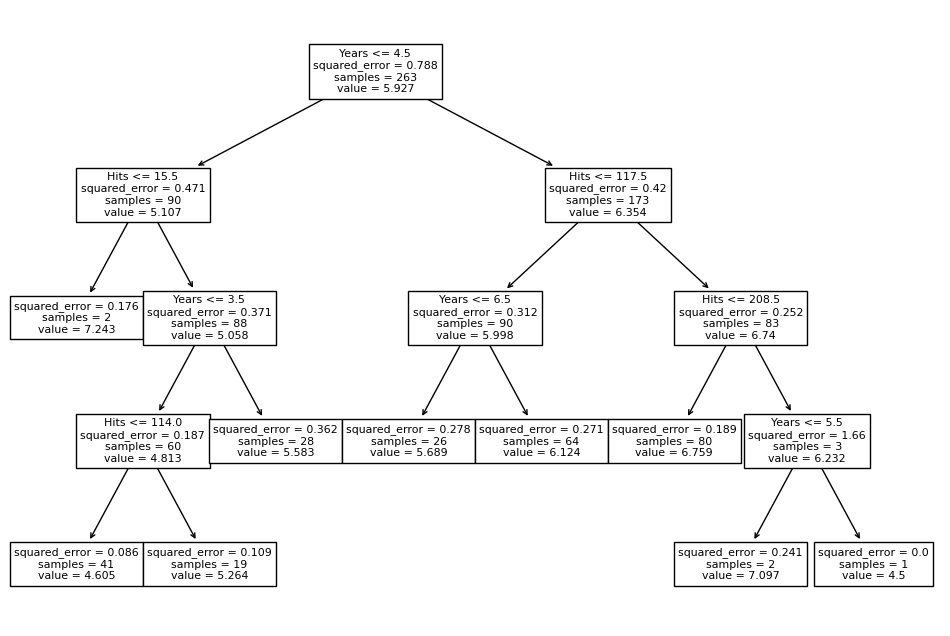

In [38]:
plt.figure(figsize=(12, 8))
plot_tree(model,feature_names=['Hits','Years'])
plt.show()


# Hits = 100, Years = 5:==> Value = 5.689

In [39]:
val = [[100, 5]] 
predval = model.predict(val)
predval


array([5.68892506])

# Q4


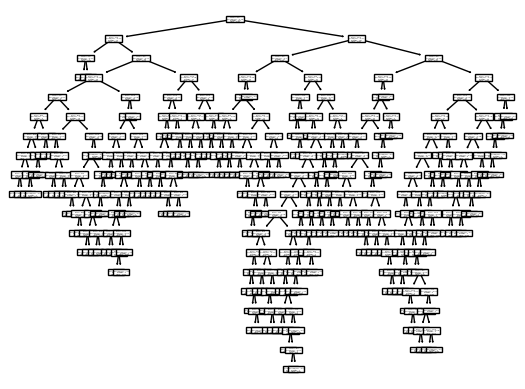

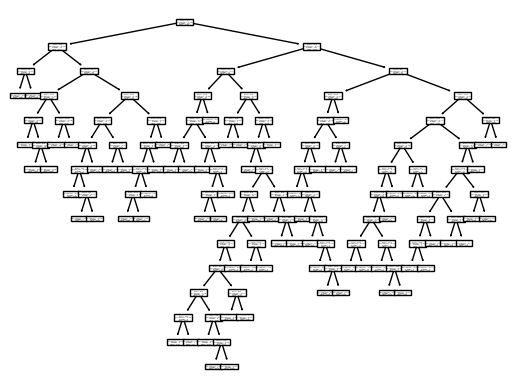

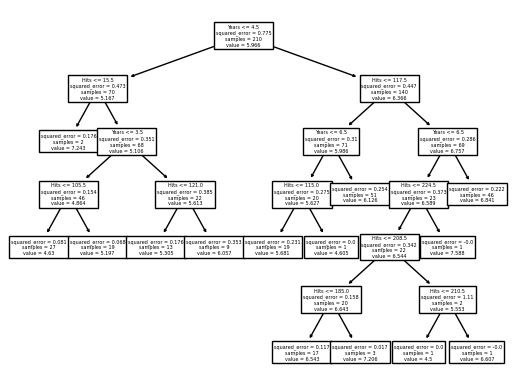

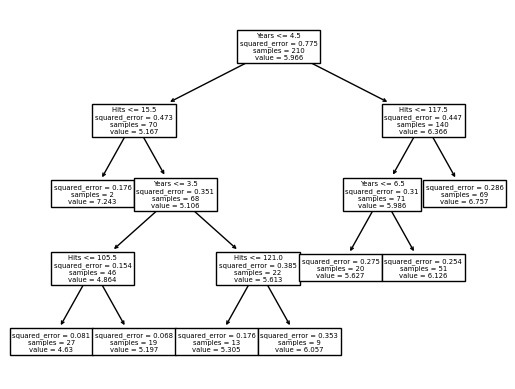

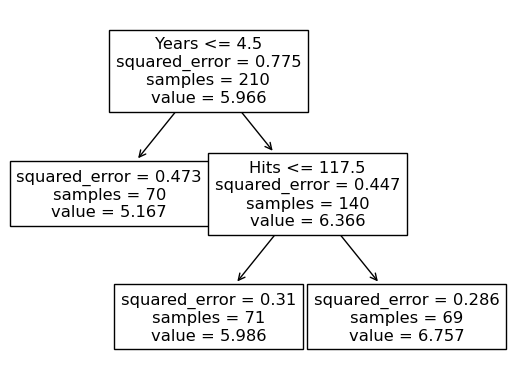

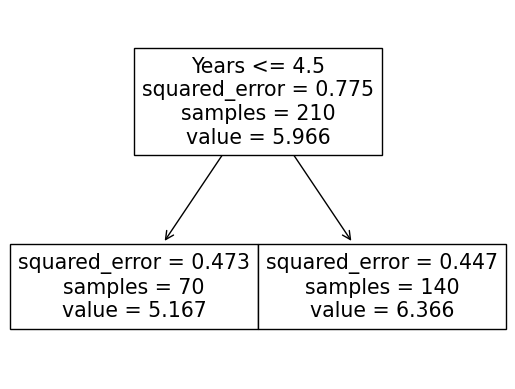

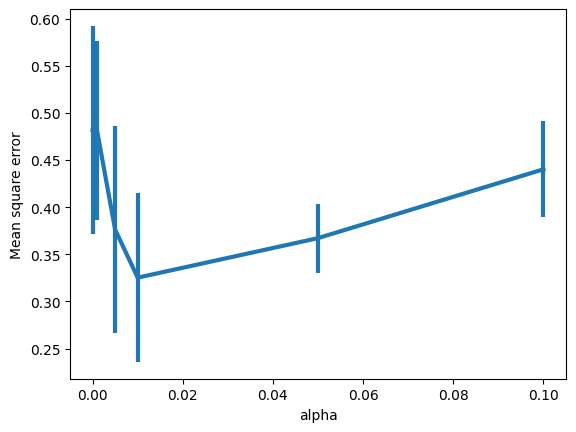

In [40]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import numpy as np
from ISLP import load_data
Hitters = load_data("Hitters").dropna()
X = Hitters[['Hits', 'Years']].values # Features
y = np.log(Hitters['Salary']).values # Response variable
ccp_range = [0,0.001,0.005,0.01,0.05,0.1]
kf = KFold(n_splits=5)
mse = []; std_error = []
for ccp in ccp_range:
    temp = []; plotted = False
    for train,test in kf.split(X):
        model = DecisionTreeRegressor(ccp_alpha=ccp)
        model.fit(X[train], y[train])
        ypred = model.predict(X[test])
        temp.append(mean_squared_error(y[test],ypred))
        if not plotted:
            plot_tree(model,feature_names=['Hits','Years'])
            plotted=True
            plt.show()
    mse.append(np.array(temp).mean())
    std_error.append(np.array(temp).std())
plt.errorbar(ccp_range,mse,yerr=std_error,linewidth=3)
plt.xlabel('alpha')
plt.ylabel('Mean square error')
plt.show()

# Q4a.
 When alpha = 0.01, it showing the best model performance, because eman squarer error is lowest.


# Q4b 
- When alpha= 0.0, gives the largest tree.
- When alpha= 0.1, gives the smallest tree.

# Q5


In [42]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from ISLP import load_data


X = Hitters[["AtBat","Hits","Runs","Walks","Years","League","Division"]]
y = Hitters['NewLeague'] # Response variable




In [44]:
X.head()

,AtBat,Hits,Runs,Walks,Years,League,Division
1,315,81,24,39,14,N,W
2,479,130,66,76,3,A,W
3,496,141,65,37,11,N,E
4,321,87,39,30,2,N,E
5,594,169,74,35,11,A,W


In [47]:
le = LabelEncoder()
Hitters["League"] = le.fit_transform(Hitters["League"])
Hitters["Division"] = le.fit_transform(Hitters["Division"])
X = Hitters[["AtBat","Hits","Runs","Walks","Years","League","Division"]]
y = Hitters['NewLeague'] # Response variable

In [48]:
X.head()

,AtBat,Hits,Runs,Walks,Years,League,Division
1,315,81,24,39,14,1,1
2,479,130,66,76,3,0,1
3,496,141,65,37,11,1,0
4,321,87,39,30,2,1,0
5,594,169,74,35,11,0,1


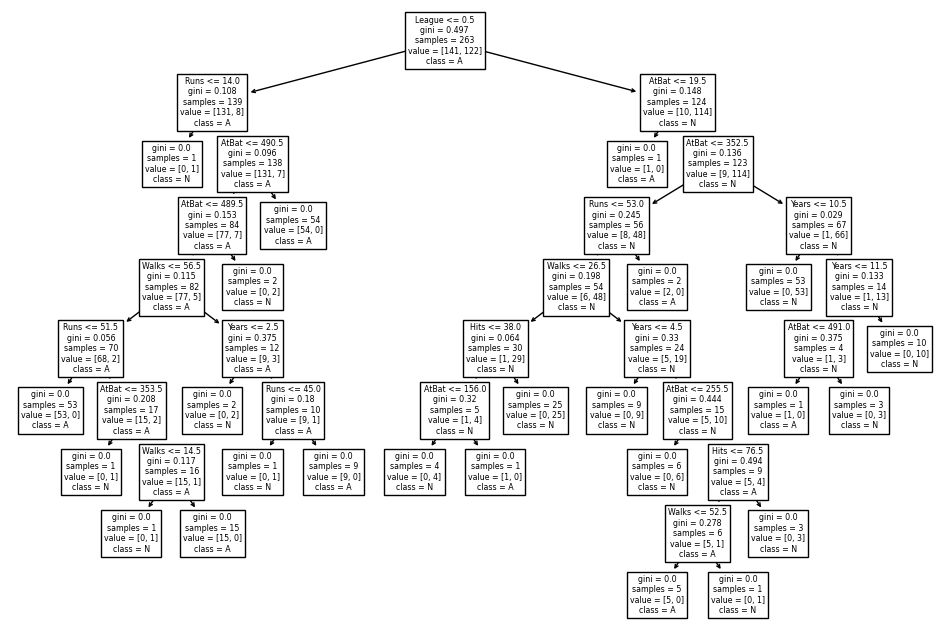

In [49]:
model = DecisionTreeClassifier(ccp_alpha=0.001)
model.fit(X,y)

plt.figure(figsize=(12, 8))
plot_tree(model,feature_names=model.feature_names_in_,class_names=model.classes_)
plt.show()

In [50]:
# AtBat = 350, Hits = 160, Runs = 50, Walks = 35, Years = 8, Division = E, League = A

Xa = [[350, 160, 50, 35, 8, 0, 0]]


#Xa= [[350, 160, 50, 35, 8, le.fit_transform(['E']), le.fit_transform(['A'])]]

Ya = model.predict(Xa)
print(Ya)



['A']


C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
